In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
df = pd.read_csv('lending_club_loan_two.csv')
data_info=pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [157]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [158]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [159]:
feat_info('mort_acc')

Number of mortgage accounts.


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#info Note: This method prints information about a DataFrame including the index dtype and columns,non-null values and memory usage.

In [161]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


describe Note:Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

DataFrame.count

    Count number of non-NA/null observations.
DataFrame.max

    Maximum of the values in the object.
DataFrame.min

    Minimum of the values in the object.
DataFrame.mean

    Mean of the values.
DataFrame.std

    Standard deviation of the observations.
DataFrame.select_dtypes

    Subset of a DataFrame including/excluding columns based on their dtype.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

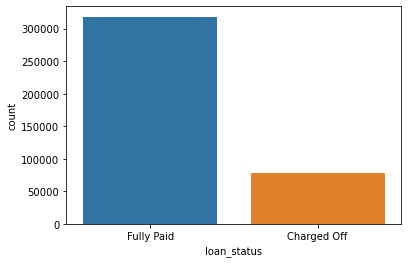

In [162]:
sns.countplot(x='loan_status',data=df)

In [163]:
feat_info('loan_status')

Current status of the loan


Loan_status Note: blue means who already paid loan. yellow means who did not pay loan yet

C:\Users\aamil\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

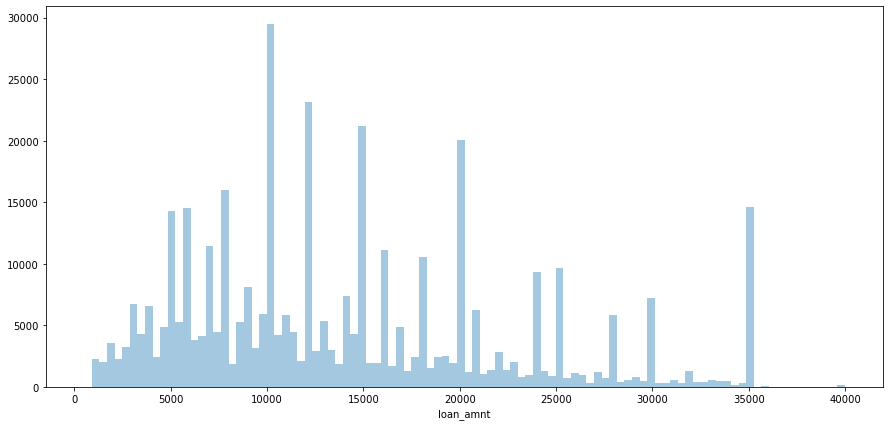

In [164]:
plt.figure(figsize=(15,7))
sns.distplot(df['loan_amnt'],kde=False, bins=100)

In [165]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


loan_amnt Note:
(x_label= 500tk teke maximum 40000tk range show korano hoise)
(y_label= total loan taker 0-396030 member)


In [166]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


corr Note:
    Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

<AxesSubplot:>

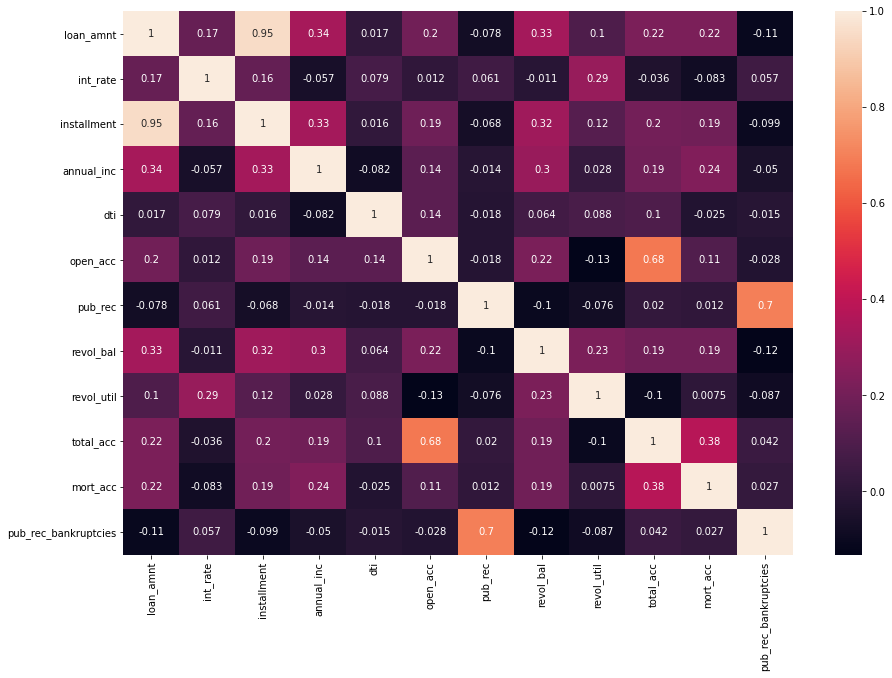

In [167]:
#showing correlation by heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)#,cmap='viridis' #for coloring

Explore "installment" feature and print out their descriptions and perform a scatterplot between them

In [168]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [169]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

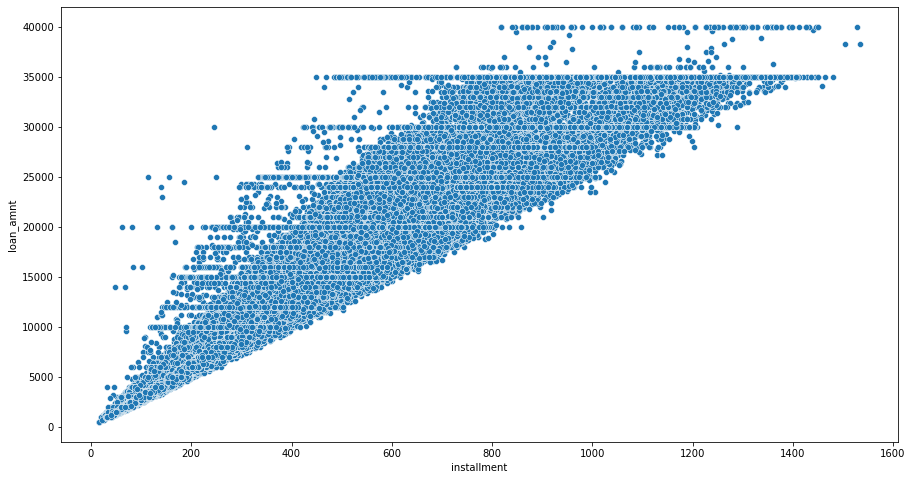

In [170]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='installment',y='loan_amnt', data=df)

# Calculate the summary statistics for the loan amount, grouped by the loan_status

In [171]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


groupby Note: loan porisod er vitti te koto jon loan porisob koreche r koto jon koreni ta dekhano hoise

# Let's explore the Grade and subGrade columns that LendingClub attributes to the loans what are the unique possible grades and subgrades?

In [172]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

Create a countplot per grade set the hue to the loan_status label

<AxesSubplot:xlabel='grade', ylabel='count'>

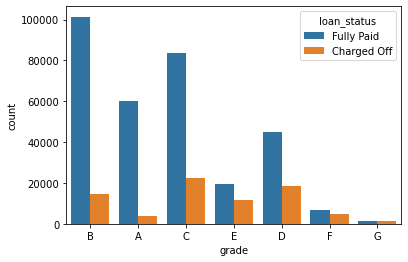

In [173]:
sns.countplot(x='grade', data=df, hue='loan_status')
#grade wise loan_status show korano hoise. kon grade e koto jon loan pay korse r koreni

In [174]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

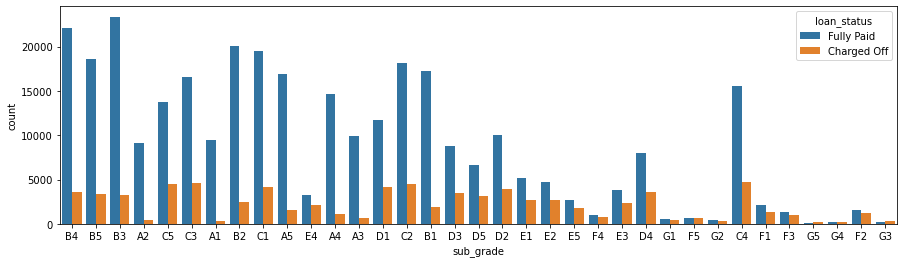

In [175]:
plt.figure(figsize=(15,4))
sns.countplot(x='sub_grade',data=df,hue='loan_status')
#elomelo vabe subgrade ploting

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

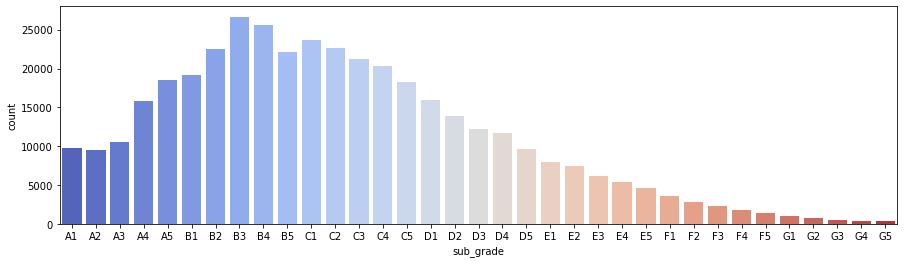

In [176]:
#we will plot the graph in order again
plt.figure(figsize=(15,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')#palette just for coloring
#result: we are getting a ordering graph.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

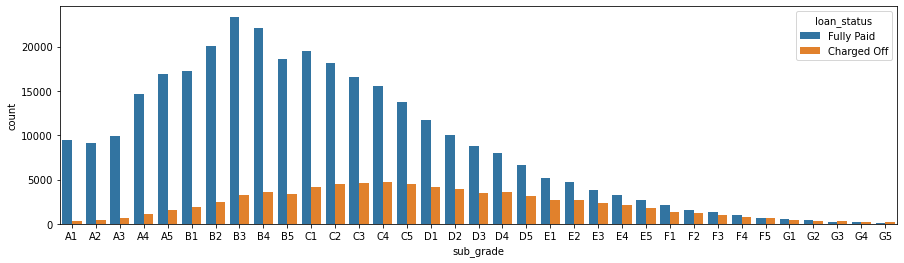

In [177]:
plt.figure(figsize=(15,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=subgrade_order)#palette just for coloring
#result: we are getting a ordering graph.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

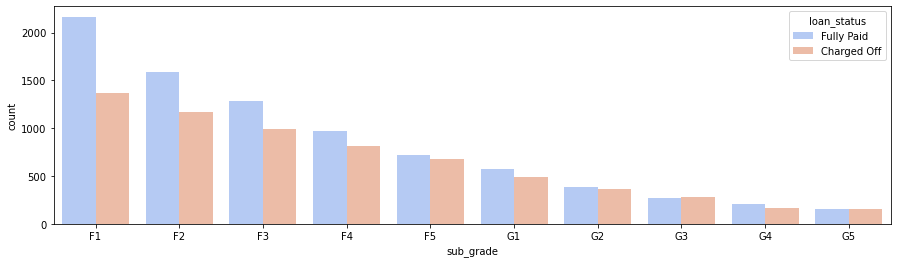

In [178]:
#loan_status er sapekke grading(with respect of loan_status we are showing grading)
#sub grading er kisu grade er modde tulona .sob gula na
f_and_g=df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(15,4))
subgrade_order=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,palette='coolwarm',hue='loan_status')

# Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "fully paid" and a 0 if it was "charged off"

catagorical teke 0/1 binary te convert kore aro loan pay er bpr ta aro clear vabe dekbo onno column er sate

In [179]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [180]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Create a bar plot showing the correlation of the numeric features to the new loan_repaid column

In [181]:
df.corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

<AxesSubplot:>

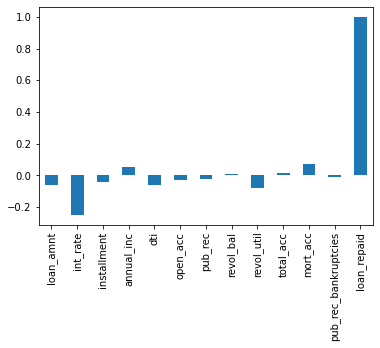

In [182]:
df.corr()['loan_repaid'].plot(kind='bar')

<AxesSubplot:>

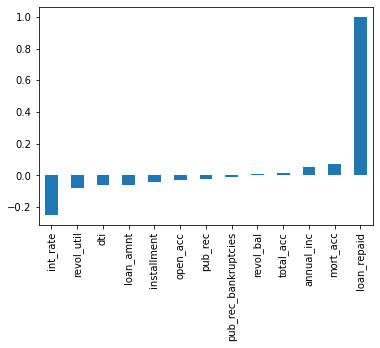

In [183]:
#we are trying to show how the correation of loan_repaid to others coloumn
df.corr()['loan_repaid'].sort_values().plot(kind='bar')

<AxesSubplot:>

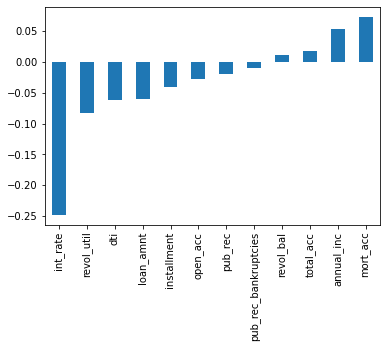

In [184]:
#we can solve that problem within one line
#now we drop the loan_repaid column after showing the statistic
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Dealing with missing data

In [185]:
#length of the dataset
len(df)

396030

Now we will show which coloum have how many missing value

In [186]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Convert this Series to be in term of percentage of the total DataFrame

In [187]:
#Full dataframe ke 100% dore kon data koto percent missing ache ta check korbo
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

# Je column er  data missing ache oi column gula analysis kore dekbo koto ta importent. important na hole drop kore dibo

emp_title column er Data Analysis korbo first

Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook


In [188]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [189]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


How many unique employment job titles are there?

In [190]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [191]:
df['emp_title'].nunique()
#this will show how much time all emp_title have

173105

Pandas dataframe.nunique() function return Series with number of distinct observations over requested axis. If we set the value of axis to be 0, then it finds the total number of unique observations over the index axis. If we set the value of axis to be 1, then it find the total number of unique observations over the column axis. It also provides the feature to exclude the NaN values from the count of unique numbers.

In [192]:
df['emp_title'].value_counts()
#which title have how many time this will show us

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
SVP & General Counsel                1
Speedway Fire Department             1
Bank of hawaii                       1
Blackthorne Capital Management       1
ASC Profiles                         1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column

In [193]:
df=df.drop('emp_title',axis=1)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [195]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


# Next emp_length column er Data Analysis korbo

In [196]:
#df['emp_length'].unique()
##or (Same output)
df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [197]:
#sort kore choto teke boro sajabo
#dropna() use korbo kono nan type value takle. <1 year er age kono value nai
emp_length_order=sorted(df['emp_length'].dropna().unique())
emp_length_order

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

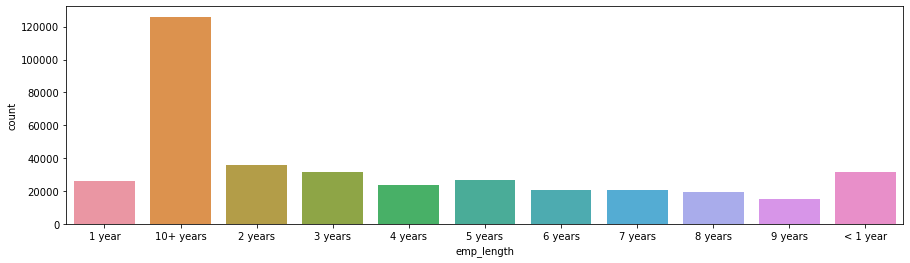

In [198]:
#kono employee koto bosor dore ache seta ber korbo
plt.figure(figsize=(15,4))
sns.countplot(x='emp_length', data= df, order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

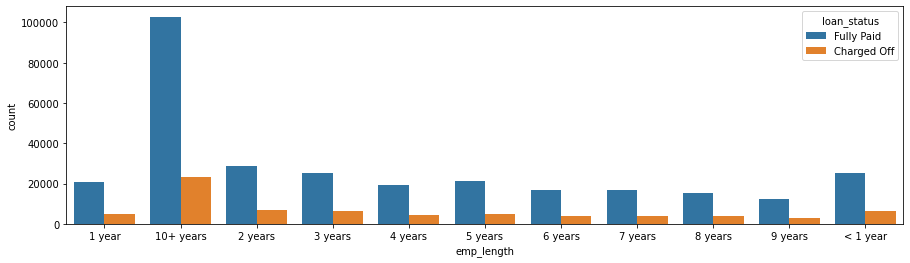

In [199]:
#loan_status ser sapekke fully paid & charged off kon employee koto bosor dore ache
plt.figure(figsize=(15,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

plot out the countplot with a hue separating Fully Paid vs Charged Off

In [200]:
#ekon amra Fully paid & charged off er radio ber korbo per year
#Step 1: loan_status er sapekke Charged off & Fully Paid ke select korbo

In [201]:
#jader loan status Charged off tader data sudu
df[df['loan_status']== 'Charged Off']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
25,6000.0,36 months,11.36,197.47,B,B5,2 years,RENT,46680.0,Not Verified,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0
26,8400.0,36 months,13.35,284.45,C,C2,6 years,RENT,35000.0,Source Verified,...,0.0,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\nDPO AE 48052,0
36,3250.0,36 months,16.78,115.52,C,C5,NaN,RENT,22500.0,Verified,...,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\nLake Mariaton, TN 30723",0
41,28000.0,60 months,19.91,312.04,E,E4,10+ years,RENT,52000.0,Verified,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396000,10000.0,36 months,12.85,336.22,B,B4,10+ years,MORTGAGE,95000.0,Source Verified,...,1.0,5718.0,57.8,37.0,w,INDIVIDUAL,6.0,1.0,"66798 Jessica Avenue Apt. 921\nPort Angela, NM...",0
396001,15000.0,60 months,15.61,361.67,D,D1,10+ years,MORTGAGE,47000.0,Source Verified,...,0.0,4621.0,55.0,15.0,w,INDIVIDUAL,1.0,0.0,"1398 Allen Mission\nAdrianstad, ME 22690",0
396002,17500.0,36 months,13.66,595.23,C,C3,< 1 year,RENT,70000.0,Source Verified,...,0.0,16637.0,88.0,42.0,f,INDIVIDUAL,0.0,0.0,"127 Gregory Vista\nFowlerville, AZ 70466",0
396011,13000.0,36 months,10.99,425.55,B,B4,10+ years,RENT,56000.0,Not Verified,...,0.0,9964.0,64.3,23.0,w,INDIVIDUAL,3.0,0.0,"7359 Stone Land\nWest Josefurt, SC 30723",0


In [202]:
#jader loan status Fully Paid tader data sudu
df[df['loan_status']== 'Fully Paid']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
5,20000.0,36 months,13.33,677.07,C,C3,10+ years,MORTGAGE,86788.0,Verified,...,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [203]:
#Step 2: Selected data ke emp_length er sapekke grouping korbo

In [204]:
df[df['loan_status']== 'Fully Paid'].groupby('emp_length')

In [205]:
df[df['loan_status']== 'Charged Off'].groupby('emp_length')

In [206]:
#Step 3: year wise Kon group e koto data ache Ta count korbo

In [207]:
df[df['loan_status']== 'Fully Paid'].groupby('emp_length').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,20728,20728,20728,20728,20728,20728,20728,20728,20728,20728,...,20728,20728,20712,20728,20728,20728,18126,20666,20728,20728
10+ years,102826,102826,102826,102826,102826,102826,102826,102826,102826,102826,...,102826,102826,102766,102826,102826,102826,95511,102753,102826,102826
2 years,28903,28903,28903,28903,28903,28903,28903,28903,28903,28903,...,28903,28903,28886,28903,28903,28903,25355,28848,28903,28903
3 years,25483,25483,25483,25483,25483,25483,25483,25483,25483,25483,...,25483,25483,25468,25483,25483,25483,22220,25437,25483,25483
4 years,19344,19344,19344,19344,19344,19344,19344,19344,19344,19344,...,19344,19344,19333,19344,19344,19344,16526,19321,19344,19344
5 years,21403,21403,21403,21403,21403,21403,21403,21403,21403,21403,...,21403,21403,21391,21403,21403,21403,18691,21381,21403,21403
6 years,16898,16898,16898,16898,16898,16898,16898,16898,16898,16898,...,16898,16898,16884,16898,16898,16898,15002,16878,16898,16898
7 years,16764,16764,16764,16764,16764,16764,16764,16764,16764,16764,...,16764,16764,16747,16764,16764,16764,15284,16751,16764,16764
8 years,15339,15339,15339,15339,15339,15339,15339,15339,15339,15339,...,15339,15339,15327,15339,15339,15339,14142,15323,15339,15339


In [208]:
df[df['loan_status']== 'Charged Off'].groupby('emp_length').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,...,5154,5154,5148,5154,5154,5154,4732,5141,5154,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,...,23215,23215,23200,23215,23215,23215,21883,23198,23215,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,...,6924,6924,6918,6924,6924,6924,6383,6916,6924,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,...,6182,6182,6179,6182,6182,6182,5660,6179,6182,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,...,4608,4608,4603,4608,4608,4608,4140,4598,4608,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,...,5092,5092,5088,5092,5092,5092,4666,5090,5092,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,...,3943,3943,3942,3943,3943,3943,3639,3940,3943,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,...,4055,4055,4052,4055,4055,4055,3770,4052,4055,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,...,3829,3829,3823,3829,3829,3829,3609,3826,3829,3829


In [209]:
#age emp_length wise all fully pain & charged off data show korse.but amder sudu loan_status er data dorkar.
#tai loan_status er data ber korbo sudu

In [210]:
df[df['loan_status']== 'Fully Paid'].groupby('emp_length').count()['loan_status']

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [211]:
df[df['loan_status']== 'Charged Off'].groupby('emp_length').count()['loan_status']

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [212]:
#Step 5: Ratio ber korar jonno data gulake alada variable e hold korbo

In [213]:
emp_Fully_paid=df[df['loan_status']== 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [214]:
emp_Charged_Off=df[df['loan_status']== 'Charged Off'].groupby('emp_length').count()['loan_status']

In [215]:
#charged off / fully paid je kono ekta dorlei hobe.karon amra just % ratio ta dia check korbo sob year er % similar kina
#emp_Charged_Off/(emp_Charged_Off+emp_Fully_paid)
emp_Fully_paid/(emp_Charged_Off+emp_Fully_paid)

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

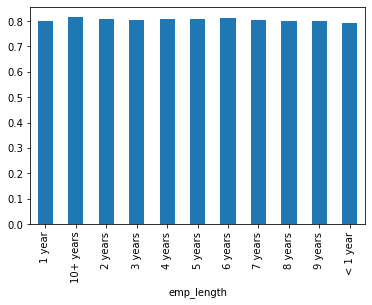

In [216]:
emp_len_ratio=emp_Fully_paid/(emp_Charged_Off+emp_Fully_paid)
emp_len_ratio.plot(kind='bar')

In [217]:
#Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column
# Oporer bar plot teke dekte emp_length sob gulai similar.tai drop kore dibo.final calculation e temon effect hobe na similar datar karone

In [218]:
df=df.drop('emp_length',axis=1)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


# Revisit the DataFrame to see what feature columns still have missing data

In [219]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [220]:
# Again title column analysis

In [221]:
df['purpose'].head(30)
#most of the data are debt_consolidation

0               vacation
1     debt_consolidation
2            credit_card
3            credit_card
4            credit_card
5     debt_consolidation
6       home_improvement
7            credit_card
8     debt_consolidation
9     debt_consolidation
10    debt_consolidation
11           credit_card
12    debt_consolidation
13    debt_consolidation
14        small_business
15        major_purchase
16    debt_consolidation
17    debt_consolidation
18    debt_consolidation
19    debt_consolidation
20    debt_consolidation
21    debt_consolidation
22                 other
23    debt_consolidation
24              vacation
25               medical
26    debt_consolidation
27    debt_consolidation
28    debt_consolidation
29    debt_consolidation
Name: purpose, dtype: object

In [222]:
df['title'].head(30)
#most of are also Debt consolidation

0                                         Vacation
1                               Debt consolidation
2                          Credit card refinancing
3                          Credit card refinancing
4                            Credit Card Refinance
5                               Debt consolidation
6                                 Home improvement
7                             No More Credit Cards
8                               Debt consolidation
9                               Debt Consolidation
10                              Debt Consolidation
11                         Credit card refinancing
12                              Debt consolidation
13                              Debt consolidation
14                                        Business
15                                  Major purchase
16                              Debt consolidation
17                              Debt consolidation
18                              Debt consolidation
19                             

In [223]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [224]:
feat_info('title')

The loan title provided by the borrower


Result of title
1. title and purpose both are provided by the borrower
2. title just string except subcategory/description of the purpose column
3. title e missing data ache but purpose e full data ache.jehutu title r purpose same type er data carry kortese tai title column ke drop kore dibo

In [225]:
df=df.drop('title',axis=1)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [226]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [227]:
# Next mort_acc Data Analysis

In [228]:
df['mort_acc'].head(30)

0     0.0
1     3.0
2     0.0
3     0.0
4     1.0
5     4.0
6     3.0
7     0.0
8     3.0
9     1.0
10    4.0
11    4.0
12    4.0
13    2.0
14    6.0
15    4.0
16    1.0
17    5.0
18    3.0
19    1.0
20    0.0
21    6.0
22    NaN
23    5.0
24    0.0
25    NaN
26    0.0
27    0.0
28    2.0
29    6.0
Name: mort_acc, dtype: float64

Basic analysis of mort_acc column
1. mort_acc column have most data missing. around 10% of data missing with respect of total data.so we can't drop this column.
2. missing data ke fill up korar jonno mort_acc er sate most highly correlation ache emn column khuje ber korte hobe first.

In [229]:
#mort_acc data jehutu numeric r on data missing tai drop na kore er sate similar ache emn data dia fill up korar try korbo

In [230]:
#so find correlation with the mort_acc column
df.corr()['mort_acc'].sort_values()
#Result: mort_acc er sate sob che correlation ache total_acc column er.

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [231]:
#Let's try this fillna() approach
#Step 1: Group the DataFrame by the total_acc
#Step 2: Calculate the mean value for the mort_acc per total_acc entry.

In [232]:
#full dataframe er jonno mean() ber korbo with respect total_acc
df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [233]:
#sudu mort_acc er jonn mean() ber korbo
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [234]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

Let's fill in the missing mort_acc values based on their total_acc value. if the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns

In [235]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]#mort_acc datar jonno total_acc datar je mean() data ta ber hoisilo oi te return korbe
    else:#missing value na takle mort_acc return hobe else part e
        return mort_acc
        
#np.isnan check korbe missing value ache kina

In [236]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

# Result of mort_acc

In [237]:
#we just fill data with respect of total_acc data
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [238]:
#ki type data ache seta check korbo
df['revol_util'].head(30)
#jehutu numeric data r kub besi value missing na tai drop korbona

0      41.8
1      53.3
2      92.2
3      21.5
4      69.8
5     100.6
6       4.9
7      64.5
8      32.9
9      82.4
10     64.4
11     18.7
12     54.9
13     94.9
14      7.2
15     11.7
16     78.4
17     54.9
18     11.9
19     55.7
20     22.9
21     37.2
22      0.0
23     43.9
24     19.1
25     40.1
26     74.8
27     24.6
28     56.7
29     56.1
Name: revol_util, dtype: float64

In [239]:
df.corr()['revol_util'].sort_values()

open_acc               -0.131420
total_acc              -0.104273
pub_rec_bankruptcies   -0.086751
loan_repaid            -0.082373
pub_rec                -0.075910
mort_acc                0.005821
annual_inc              0.027871
dti                     0.088375
loan_amnt               0.099911
installment             0.123915
revol_bal               0.226346
int_rate                0.293659
revol_util              1.000000
Name: revol_util, dtype: float64

In [240]:
df.groupby('int_rate').mean()['revol_util']

int_rate
5.32     26.406598
5.42     20.692258
5.79     21.628829
5.93     29.977030
5.99     19.533094
           ...    
30.79    49.433333
30.84     0.000000
30.89    47.366667
30.94    53.400000
30.99    55.923077
Name: revol_util, Length: 566, dtype: float64

In [241]:
int_rate_avg=df.groupby('int_rate').mean()['revol_util']

In [242]:
def fill_revol_util(int_rate,revol_util):
    if np.isnan(revol_util):
        return int_rate_avg[int_rate]#mort_acc datar jonno total_acc datar je mean() data ta ber hoisilo oi te return korbe
    else:#missing value na takle mort_acc return hobe else part e
        return revol_util

In [243]:
df['revol_util']=df.apply(lambda x: fill_revol_util(x['int_rate'],x['revol_util']),axis=1)

In [244]:
# Result of revol_util
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [245]:
df['pub_rec_bankruptcies'].head(30)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [246]:
#most of the data are 0 .that's why will drop it
df=df.drop('pub_rec_bankruptcies',axis=1)

In [247]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

# Categorical Variables and Dummy Variables

In [248]:
#Now we just need to deal with the string values due to the categorical columns
#List all the columns that are currently non-numeric
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

# term feature

In [249]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [250]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map()

In [251]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [252]:
df['term'].value_counts()
#result: month word ta soria fellam

36    302005
60     94025
Name: term, dtype: int64

# grade feature

In [253]:
#we already know grade is part of sub_grade, so just drop the grade featuer
df=df.drop('grade',axis=1)

# subgrade feature

Convert the subgrade into dummy variables. Then concatenate these new columns to the original darafarame. Remember to drop the original subgrade column and to add drop_first=True to our get_dummies call

In [254]:
#Step 1: get the dummy variable
#Here we will take a dummy copy of sub_grade first
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)
#use of drop_first=True
#---->drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables
#Step 2: secondly we will drop the sub_grade column & also concat the dummies at the same time.but first sub_grade will remove first
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)
#Male/Female: we will just take Male 0/1.Don't need to take both.like Male 0 & Female 1.
#for A/B/C :we will take 0 for A & 1 for B. if it is not A or B.Then it will automatically C

In [255]:
df.columns
#a2,a3,a4.... esob er data gula ke 0/1/2/3/5 esb data te convert kore felbo

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'address', 'loan_repaid', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [256]:
#Check Again the non-numeric
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [257]:
#check all catagoricall value to see type
#df['verification_status'].head(30)
#df['purpose'].head(30)
#df['initial_list_status'].head(30)
#df['application_type'].head(30)

Convert these columns:['verification_status','application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns

In [258]:
dummies=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df=pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [259]:
#Check Again the non-numeric
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

# home_ownership

In [260]:
df['home_ownership'].head(20)

0         RENT
1     MORTGAGE
2         RENT
3         RENT
4     MORTGAGE
5     MORTGAGE
6     MORTGAGE
7         RENT
8         RENT
9     MORTGAGE
10        RENT
11    MORTGAGE
12         OWN
13    MORTGAGE
14    MORTGAGE
15    MORTGAGE
16    MORTGAGE
17    MORTGAGE
18        RENT
19    MORTGAGE
Name: home_ownership, dtype: object

In [261]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT,OWN,OTHER. then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns

In [262]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')
#result: Replace NONE & ANY with OTHER

In [263]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [264]:
#creating dummies
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)

df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [265]:
#Check Again the non-numeric
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

# address feature

Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column

In [266]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [267]:
#we will extract zip code from the address column
df['address'].apply(lambda address:address[-5:])

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: object

In [268]:
df['zip_code']=df['address'].apply(lambda address:address[-5:])

In [269]:
#checking how much type of zip code is there
df['zip_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

In [270]:
#creating zip code dummies
dummies=pd.get_dummies(df['zip_code'],drop_first=True)

df=pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [271]:
#we will drop the original address column
df=df.drop('address',axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


In [272]:
#Check Again the non-numeric
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

# issue_d

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature


In [273]:
feat_info('issue_d')
#ke loan dibe r dibena ber korte hobe.kintu amra janina ke kokon loan korbe.tai ei data amder kono kaje asbe na.drop kore dibo

The month which the loan was funded


In [274]:
df['issue_d'].head(10)

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
5    Sep-2015
6    Sep-2015
7    Sep-2012
8    Oct-2014
9    Apr-2012
Name: issue_d, dtype: object

In [275]:
#kokon ke loan nibe seta amra janina.tai ei coloum er dorkar nia amder model
df=df.drop('issue_d',axis=1)

In [276]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

# earliest_cr_line

This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert into a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature

In [277]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [278]:
df['earliest_cr_line'].head(30)

0     Jun-1990
1     Jul-2004
2     Aug-2007
3     Sep-2006
4     Mar-1999
5     Jan-2005
6     Aug-2005
7     Sep-1994
8     Jun-1994
9     Dec-1997
10    Dec-1990
11    May-1984
12    Apr-1995
13    Jan-1997
14    May-2001
15    Sep-1994
16    Mar-1982
17    Sep-1996
18    Jan-1990
19    Mar-2000
20    Jan-2006
21    Mar-1999
22    Oct-2006
23    Jan-2003
24    May-2008
25    Oct-2003
26    Jun-2004
27    Jan-1999
28    Apr-1994
29    Mar-2000
Name: earliest_cr_line, dtype: object

In [279]:
df['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jan-1948       1
Jun-1955       1
Apr-1960       1
Jul-1958       1
Dec-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [280]:
#catagorical month gula delete kore dia sudu numeric year gula rakbo
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 396030, dtype: int64

In [281]:
#kon year koto bar ache ta check korbo
df['earliest_cr_line'].value_counts()

2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [282]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# loan_status

drop the loan_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s

In [283]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [284]:
df['loan_repaid'].value_counts()

1    318357
0     77673
Name: loan_repaid, dtype: int64

In [285]:
df=df.drop('loan_status',axis=1)

# Data Preprocessing

In [286]:
#Train Test Split

In [287]:
from sklearn.model_selection import train_test_split

Set X and y variables to the .values of the features and label

In [288]:
X=df.drop('loan_repaid',axis=1).values

In [289]:
y=df['loan_repaid'].values

In [290]:
print(len(df))

396030


In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Normalizing the Data

Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data

In [292]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005] for the transformed number of households.

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. Scaling the data means it helps to Normalize the data within a particular range.

When MinMaxScaler is used the it is also known as Normalization and it transform all the values in range between (0 to 1) formula is x = [(value - min)/(Max- Min)]

In [293]:
scaler=MinMaxScaler()

In [294]:
X_train=scaler.fit_transform(X_train)

fit() just calculates the parameters (e.g. μ and σ

in case of StandardScaler) and saves them as an internal object's state. Afterwards, you can call its transform() method to apply the transformation to any particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x
, while also returning the transformed x′. Internally, the transformer object just calls first fit() and then transform() on the same data.

fit the imputer calculates the means of columns from some data, and by transform it applies those means to some data (which is just replacing missing values with the means). If both these data are the same (i.e. the data for calculating the means and the data that means are applied to) you can use fit_transform which is basically a fit followed by a transform.

In [295]:
X_test=scaler.transform(X_test)

transform replaces the missing values with a number. By default this number is the means of columns of some data that you choose.

In [296]:
X_train.shape

(316824, 77)

In [297]:
X_test.shape

(79206, 77)

# Creating the Model

In [298]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [299]:
model=Sequential()
#Dense layer: ager layer porer layer er sate kivabe connected takbe
#nuron ki: 
#activatation: je layer a value gula pass hobe oi valure gula jeno ekta fixed range er vitore ase
#https://www.tensorflow.org/api_docs/python/tf/keras/activations
model.add(Dense(78,activation='relu'))#relu=rectified linear unit. #ekane node =78
#dropout:https://towardsdatascience.com/understanding-and-implementing-dropout-in-tensorflow-and-keras-a8a3a02c1bfa?gi=46319f112fcc
model.add(Dropout(0.2))
#dropout note:The primary purpose of dropout is to minimize the effect of overfitting within a trained network.Dropout technique works by randomly reducing the number of interconnecting neurons within a neural network. At every training step, each neuron has a chance of being left out, or rather, dropped out of the collated contribution from connected neurons.

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
#dropout: 
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
#model.add.Softmax() #last layer e je koyta dense takbe tader sob gular maje 100% prediction distribution kore dibe
#softmax: probability distribution: 
model.add(Dense(units=1,activation='sigmoid'))#we use sigmoid when output is 0/1 binary formate
#compile:
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#optimizer er kaj holo kivabe model ta updrage hobe based on the loss 
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#loss: kono prediction e model ekta data/item er jonno koto vul bolse/result disse setai loss

model.compile(loss='binary_crossentropy',optimizer='adam')

Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256

In [300]:
model.fit(x=X_train,y=y_train, epochs=25,batch_size=256,validation_data=(X_test,y_test))
#fit method is for traning.
#epochs: koto bar training korbe
#batch_size: 

Train on 316824 samples, validate on 79206 samples
Epoch 1/25
316824/316824 [==============================] - 5s 15us/sample - loss: 0.2980 - val_loss: 0.2615
Epoch 2/25
316824/316824 [==============================] - 4s 14us/sample - loss: 0.2657 - val_loss: 0.2599
Epoch 3/25
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2632 - val_loss: 0.2595
Epoch 4/25
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2620 - val_loss: 0.2590
Epoch 5/25
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2615 - val_loss: 0.2588
Epoch 6/25
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2607 - val_loss: 0.2589
Epoch 7/25
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2602 - val_loss: 0.2591
Epoch 8/25
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2599 - val_loss: 0.2585
Epoch 9/25
316824/316824 [==============================] - 4s 12us/sample - 

# Save my model

In [301]:
from tensorflow.keras.models import load_model

In [302]:
model.save('loanmodel.h5')

# Evaluating Model Performance

In [305]:
model.history.history

{'loss': [0.2979664799187474,
  0.26571023718707476,
  0.2631701073062464,
  0.26200393918933007,
  0.2614715273665096,
  0.26070111242189004,
  0.2602378781775322,
  0.25985937796308667,
  0.2597829186955182,
  0.2593058593447207,
  0.2590423195871642,
  0.25906227626237766,
  0.2588580236765627,
  0.258587544677044,
  0.2584154590702062,
  0.25815103231296815,
  0.2579157247853797,
  0.2577492440443396,
  0.2573926727633234,
  0.2575845649933943,
  0.2572193089884357,
  0.2569973789311821,
  0.2569026399731254,
  0.2566071716277036,
  0.25680317481283593],
 'val_loss': [0.26147708255010577,
  0.259913300124936,
  0.259533180193814,
  0.2590460364807676,
  0.2587508537509064,
  0.25886048212321217,
  0.2591276329766168,
  0.25850401146256635,
  0.25820628340908386,
  0.2586380179291454,
  0.2581868859102632,
  0.258278514581374,
  0.2579476023857857,
  0.25830102789294546,
  0.2584160870907689,
  0.25799222714602427,
  0.2582386394969394,
  0.25797488023180454,
  0.25830790691732974,


In [306]:
losses=pd.DataFrame(model.history.history)

val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data.

In [312]:
losses
#loss= traing loss & val_loss=test loss

,loss,val_loss
0,0.297966,0.261477
1,0.265710,0.259913
2,0.263170,0.259533
3,0.262004,0.259046
4,0.261472,0.258751
5,0.260701,0.258860
6,0.260238,0.259128
7,0.259859,0.258504
8,0.259783,0.258206
9,0.259306,0.258638


<AxesSubplot:>

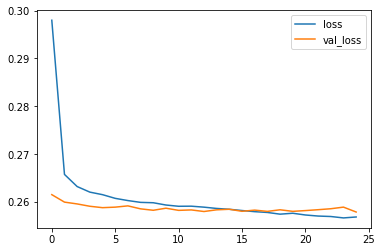

In [311]:
losses.plot()

# Classification report and Confusion matrix for the X_test set

In [313]:
from sklearn.metrics import classification_report,confusion_matrix

In [314]:
predictions=model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [318]:
confusion_matrix(y_test,predictions)

array([[ 6877,  8616],
       [  151, 63562]], dtype=int64)

# Finished

In [319]:
df['loan_repaid'].value_counts()

1    318357
0     77673
Name: loan_repaid, dtype: int64

In [321]:
len(df)

396030

In [320]:
318357/len(df)
#result: data set is normaly giving its own prediction up to 80%.our model prediction 89%.not pretty good

0.8038709188697826

# Give the customer below, would i offer this person a loan?

In [336]:
import random
random.seed(101)
random_ind=random.randint(0,len(df))

new_customer=df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      24000.00
term              60.00
int_rate          13.11
installment      547.43
annual_inc     85000.00
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 304691, Length: 77, dtype: float64

In [337]:
new_customer.values

array([2.4000e+04, 6.0000e+01, 1.3110e+01, 5.4743e+02, 8.5000e+04,
       1.0980e+01, 1.9910e+03, 6.0000e+00, 0.0000e+00, 3.5464e+04,
       6.6800e+01, 2.9000e+01, 8.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [338]:
#we will give shape like our model.our model have 76 features.so we will add this
new_customer.values.reshape(1,77)

array([[2.4000e+04, 6.0000e+01, 1.3110e+01, 5.4743e+02, 8.5000e+04,
        1.0980e+01, 1.9910e+03, 6.0000e+00, 0.0000e+00, 3.5464e+04,
        6.6800e+01, 2.9000e+01, 8.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [339]:
new_customer=scaler.transform(new_customer.values.reshape(1,77))
new_customer

array([[0.59493671, 1.        , 0.30346708, 0.35009521, 0.00976273,
        0.00109811, 0.68115942, 0.06666667, 0.        , 0.02980053,
        0.43660131, 0.18120805, 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [340]:
model.predict_classes(new_customer)
#loan dia jabe kina check korlam.
#result 1.tai loan dia jabe

array([[1]])

Now check, did this person actually end up paying back their loan?

In [341]:
df.iloc[random_ind]

loan_amnt      24000.00
term              60.00
int_rate          13.11
installment      547.43
annual_inc     85000.00
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 304691, Length: 78, dtype: float64

In [342]:
df.iloc[random_ind]['loan_repaid']
#result 1: tar mane loan pay back korbe.

1.0